In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
renda_ordenada = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
colunas = ['Q025', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'SG_UF_RESIDENCIA']
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)

dados_total = pd.concat(chunks)
del chunks
dados_total['NU_NOTA_TOTAL'] = dados_total[provas].sum(axis=1)

In [4]:
dados_sem_nota_zero = dados_total.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero

,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
0,PA,472.9,466.0,497.3,369.1,780.0,B,A,2585.3
1,PA,358.9,495.4,482.3,416.5,600.0,B,A,2353.1
2,PA,574.2,538.7,582.6,571.5,640.0,C,B,2907.0
5,PA,522.0,592.6,582.0,605.3,580.0,C,A,2881.9
6,PA,407.4,480.1,464.3,581.5,360.0,C,B,2293.3
...,...,...,...,...,...,...,...,...,...
5095261,BA,486.7,457.8,506.7,488.5,280.0,B,B,2219.7
5095262,BA,454.2,542.7,599.3,504.7,400.0,C,B,2500.9
5095263,BA,450.4,469.0,515.7,552.0,580.0,C,B,2567.1
5095268,BA,458.8,380.6,493.1,396.7,800.0,I,B,2529.2


In [23]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
prova_saida = "NU_NOTA_MT"
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]

In [24]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,466.0,497.3,780.0
1,495.4,482.3,600.0
2,538.7,582.6,640.0
5,592.6,582.0,580.0
6,480.1,464.3,360.0
...,...,...,...
5095261,457.8,506.7,280.0
5095262,542.7,599.3,400.0
5095263,469.0,515.7,580.0
5095268,380.6,493.1,800.0


In [25]:
x = notas_entrada
y = notas_saida

In [26]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [27]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)

/home/brltt/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=4321)

In [29]:
predicoes_matematica = modelo.predict(x_teste)

(-300.0, 1050.0)

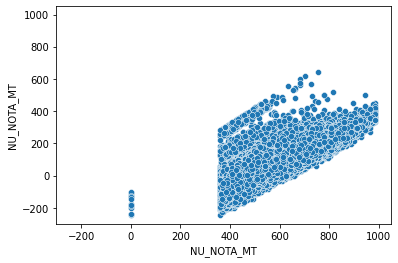

In [41]:
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)
plt.xlim((-300, 1050))
plt.ylim((-300, 1050))

(-300.0, 1050.0)

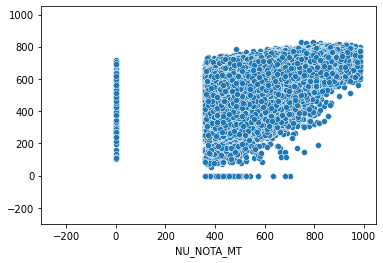

In [42]:
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-300, 1050))
plt.ylim((-300, 1050))

In [45]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [46]:
resultados["Quadrado_Diferenca"].mean()

8342.561470170414

In [47]:
resultados["Quadrado_Diferenca"].mean()**(1/2)

91.33762351939322

In [76]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor(strategy = 'mean')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [77]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

11878.783963762904

In [53]:
mean_squared_error(y_teste, predicoes_matematica)

8342.561470170414

In [ ]:
#Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

In [54]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

reg = reg.fit(x_treino, y_treino)
nn_predicoes = reg.predict(x_teste)

In [55]:
mean_squared_error(y_teste, nn_predicoes)

6021.909054432889

(-400.0, 1050.0)

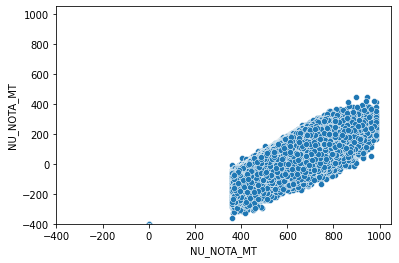

In [57]:
sns.scatterplot(x=y_teste, y=y_teste - nn_predicoes)
plt.xlim((-400, 1050))
plt.ylim((-400, 1050))

In [58]:
max(y_teste - nn_predicoes)

448.7182862911152

In [59]:
max(y_teste - predicoes_matematica)

640.9803937254388

In [60]:
min(y_teste - nn_predicoes)

-705.5031666236613

In [61]:
min(y_teste - predicoes_matematica)

-599.4626183747047

In [ ]:
#Ler a documentacao do dummy e alterar o metodo.

In [107]:
modelo_dummy = DummyRegressor(strategy = 'quantile', quantile=0.58)
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [108]:
mean_squared_error(y_teste, dummy_predicoes)

11900.09996519697

In [ ]:
#Buscar outras metricas para avaliar modelos de regressao.

In [124]:
from sklearn.metrics import mean_tweedie_deviance
mean_tweedie_deviance(y_teste, nnnz, power=2)

array([439.22750283, 474.08145746, 601.09921687, ..., 453.77017253,
       438.54202132, 436.38781456])

In [114]:
r2_score(y_teste, predicoes_matematica)

0.2976914088294381

In [115]:
r2_score(y_teste, dummy_predicoes)

-0.0017957279942721893

In [126]:
nnnz = nn_predicoes
nnnz

array([439.22750283, 474.08145746, 601.09921687, ..., 453.77017253,
       438.54202132, 436.38781456])

In [131]:
nnnz_df = pd.DataFrame(data=nnnz, columns=["NU_NOTA_MT"])

In [132]:
nnnz_df

,NU_NOTA_MT
0,439.227503
1,474.081457
2,601.099217
3,508.842198
4,524.986748
...,...
925489,443.655289
925490,440.341420
925491,453.770173
925492,438.542021


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

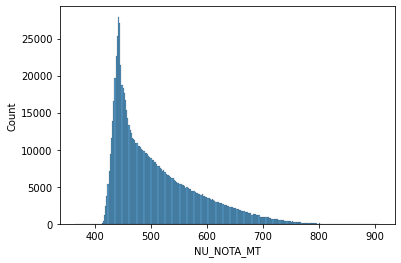

In [135]:
sns.histplot(nnnz_df, x="NU_NOTA_MT")

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

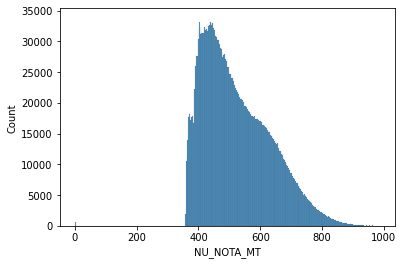

In [136]:
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_MT")

In [137]:
matpred_df = pd.DataFrame(data=predicoes_matematica, columns=["NU_NOTA_MT"])
matpred_df

,NU_NOTA_MT
0,450.468064
1,490.274231
2,550.574165
3,503.865856
4,516.068491
...,...
925489,416.856369
925490,444.777609
925491,448.874506
925492,421.231781


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

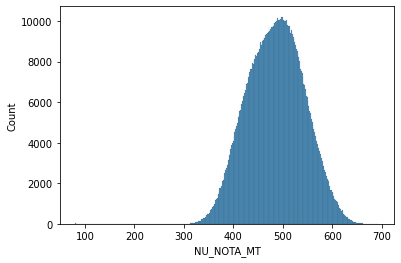

In [138]:
sns.histplot(matpred_df, x="NU_NOTA_MT")

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

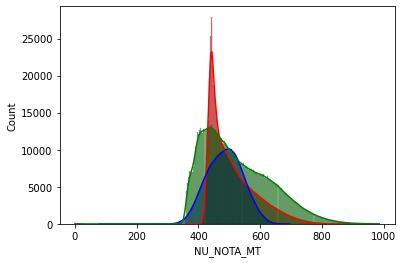

In [144]:
#fig, ax = plt.subplots()
#for a in [nnnz_df, matpred_df, dados_sem_nota_zero]:

y_df = pd.DataFrame(data=y_teste, columns=["NU_NOTA_MT"])

sns.histplot(nnnz_df, x="NU_NOTA_MT", color='r', kde=True)
sns.histplot(matpred_df, x="NU_NOTA_MT", color='b', kde=True)
sns.histplot(y_df, x="NU_NOTA_MT", color='g', kde=True)